In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, plot_roc_curve
from sklearn.model_selection import TimeSeriesSplit, train_test_split, GridSearchCV



%matplotlib inline

# Data Exploration
first loading in the data compiled

In [ ]:
master_df = pd.read_csv('data/master')

In [35]:
master_df.columns

Index(['Alder', 'Ash', 'Ashe Juniper / Bald Cypress', 'Black Gum ',
       'Black Walnut', 'Bushes', 'Birch', 'Cedar', 'Cotton Wood', 'Dogwood',
       'Elm', 'Glandular Mesquite', ' Hackberry', 'Hickory', 'Mulberry',
       'Maple', 'Osage Orange', 'Oak', 'Sycamore', 'Pine', 'Privet',
       'Sweet Gum', 'Gingko Biloba', 'Magnolia', 'Willow', 'Tree Total',
       'Grass Total', 'Tree & Grass Total', 'Amaranth', 'Burweed / Marshelder',
       'Cattail', 'Dog Fennel', 'Lamb's Quarters', 'Nettle', 'Partridge Pea',
       'Pigweed', 'Plum Grannet', 'Ragweed', 'Rumex', 'Sagebrush', 'Saltbrush',
       'Sedge', 'Sneezeweed', 'Other Weed', 'Weed Total', 'Pollen Total',
       'Tech.', 'AWND_60', 'PRCP_60', 'TAVG_60', 'AWND_18', 'PRCP_18',
       'TAVG_18', 'AWND_S', 'PRCP_S', 'TAVG_S', 'WDF2_S', 'pollen_weighted',
       'super_high', 'very_high', 'high'],
      dtype='object')

In [36]:
#isolating the columns to be considered for modeling and checking 
main_df = master_df[list(master_df.columns[-16:])]
main_df.tail()

,Pollen Total,Tech.,AWND_60,PRCP_60,TAVG_60,AWND_18,PRCP_18,TAVG_18,AWND_S,PRCP_S,TAVG_S,WDF2_S,pollen_weighted,super_high,very_high,high
DATE,,,,,,,,,,,,,,,,
2022-03-27,1742.666667,off,8.95,0.00,72.0,10.96,0.00,70.0,6.04,0.00,65.5,200,1871.0,1,1,1
2022-03-28,1886.000000,TL,8.95,0.00,72.0,12.08,0.00,71.0,8.50,0.00,67.5,180,2047.0,1,1,1
2022-03-29,1866.000000,RP,17.00,0.00,74.0,17.00,0.00,74.0,14.76,0.00,74.0,170,1990.0,1,1,1
2022-03-30,2376.000000,TL,14.32,0.38,74.0,15.21,0.45,74.0,12.53,0.54,62.5,300,2486.0,1,1,1
2022-03-31,5163.000000,TL,5.14,0.00,63.0,7.38,0.00,65.0,6.04,0.00,55.5,270,5235.0,1,1,1


In [37]:
main_df.describe()

,Pollen Total,AWND_60,PRCP_60,TAVG_60,AWND_18,PRCP_18,TAVG_18,AWND_S,PRCP_S,TAVG_S,WDF2_S,pollen_weighted,super_high,very_high,high
count,3372.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3350.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000,3372.000000
mean,269.149318,7.496399,0.153845,70.201097,8.034180,0.156935,71.247715,6.505012,0.135380,66.462782,186.381969,389.234282,0.065540,0.200178,0.525208
std,678.573200,3.097958,0.592509,12.940881,3.234652,0.587248,12.481789,2.929793,0.419526,15.995824,96.488726,756.225994,0.247513,0.400193,0.499438
min,0.000000,0.890000,0.000000,21.000000,0.670000,0.000000,22.000000,0.220000,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,5.140000,0.000000,61.000000,5.590000,0.000000,63.000000,4.250000,0.000000,54.500000,130.000000,36.000000,0.000000,0.000000,0.000000
50%,38.000000,6.930000,0.000000,73.000000,7.610000,0.000000,74.000000,6.040000,0.000000,68.500000,180.000000,111.000000,0.000000,0.000000,1.000000
75%,190.000000,9.170000,0.020000,81.000000,9.840000,0.030000,82.000000,8.500000,0.020000,80.500000,260.000000,367.000000,0.000000,0.000000,1.000000
max,9074.000000,23.490000,16.070000,91.000000,24.160000,12.070000,90.000000,17.000000,5.340000,94.000000,360.000000,9230.000000,1.000000,1.000000,1.000000


In [38]:
set(main_df['Tech.'].values)

{'?', 'CU', 'GG', 'NC', 'NR', 'R', 'RP', 'TL', 'cu', 'nc', 'off', 'rp'}

<AxesSubplot:>

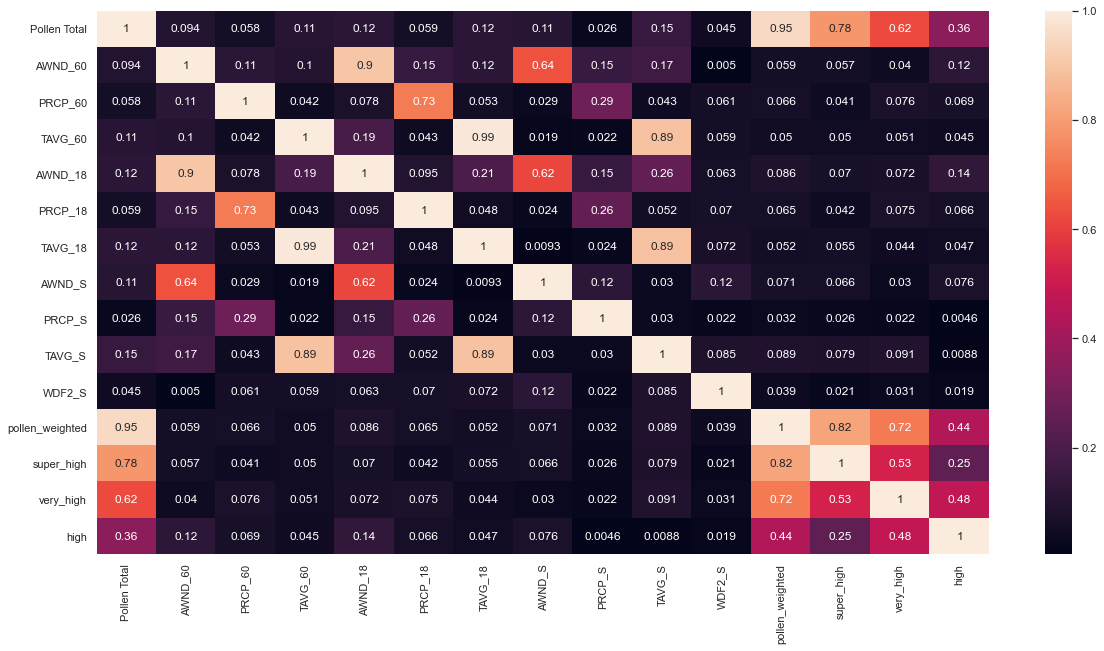

In [39]:
sns.set(rc = {'figure.figsize': (20,10)})
sns.heatmap(main_df.corr().abs(), annot=True)

<AxesSubplot:>

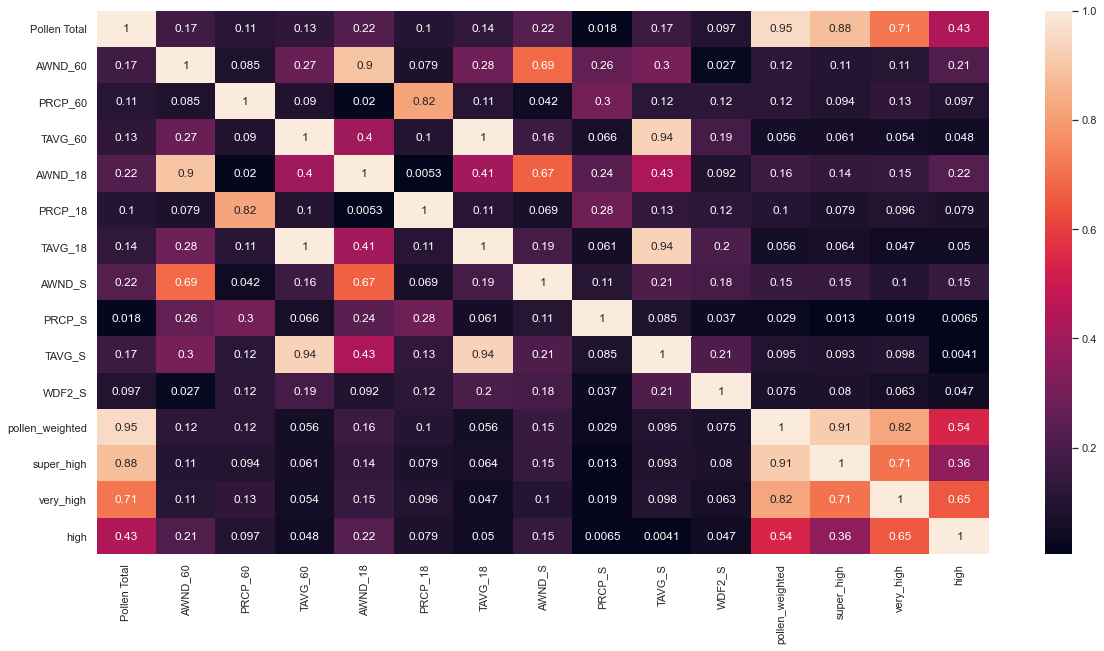

In [40]:
sns.heatmap(main_df.resample('W').mean().corr().abs(), annot=True)

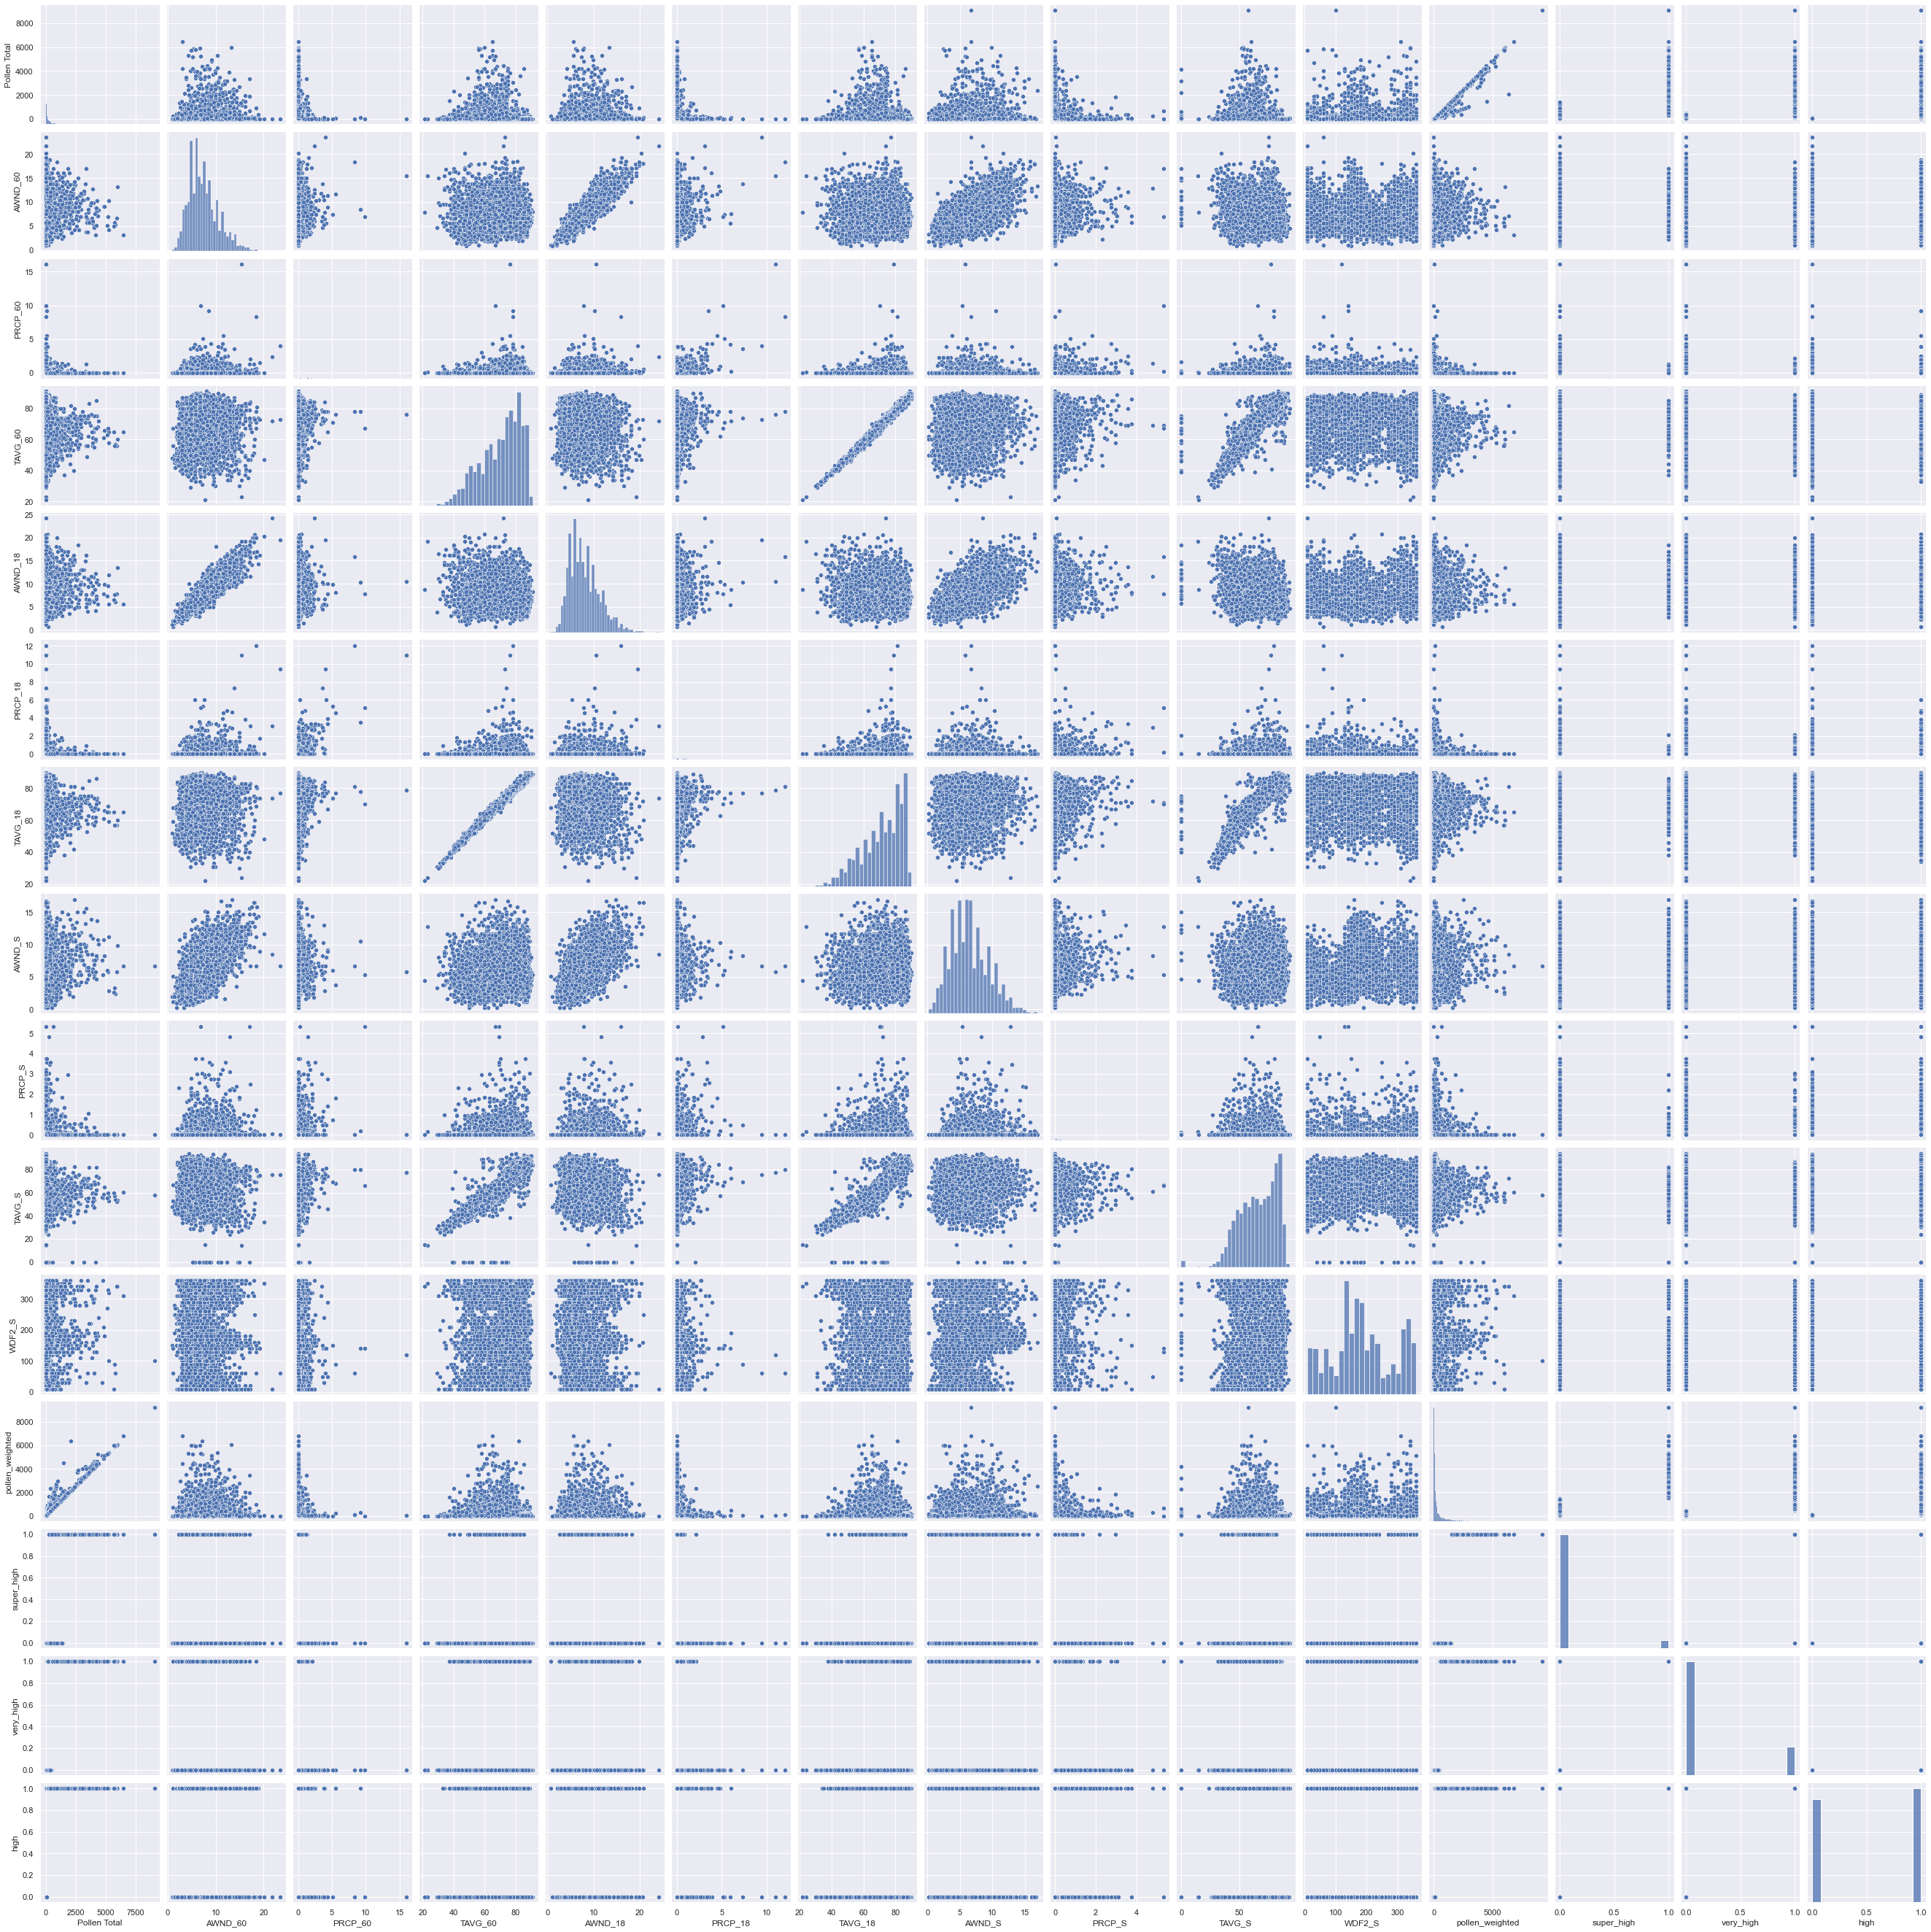

In [42]:
sns.pairplot(main_df)

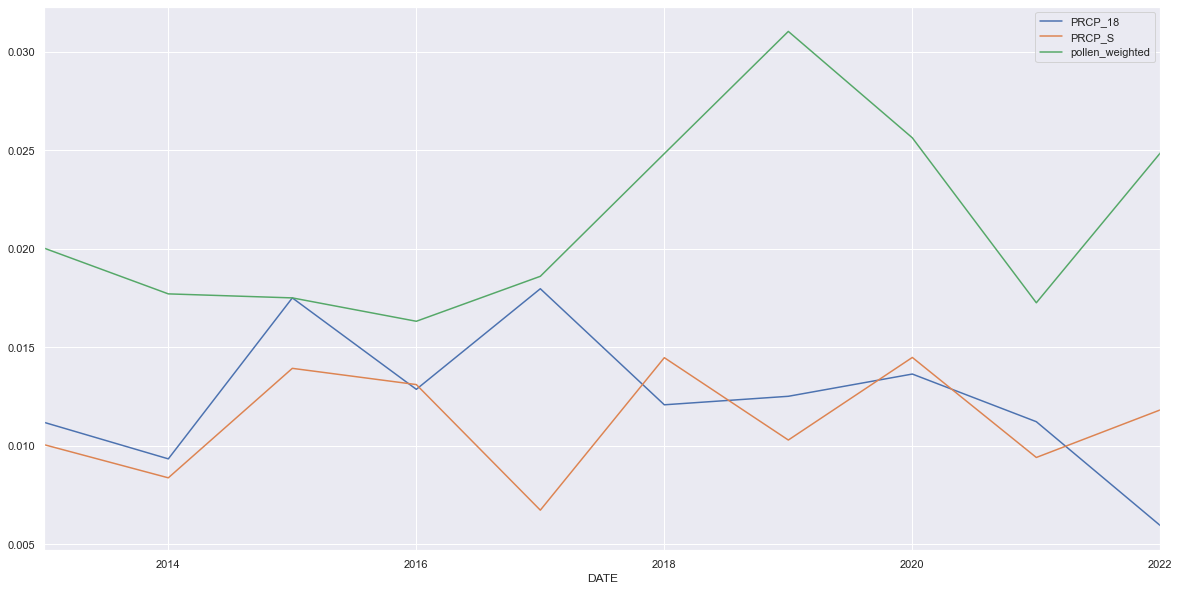

In [54]:
(main_df['PRCP_18'].resample('A').mean()/main_df['PRCP_18'].max()).plot()
(main_df['PRCP_S'].resample('A').mean()/main_df['PRCP_18'].max()).plot()
(main_df['pollen_weighted'].resample('A').mean()/main_df['pollen_weighted'].max()*0.5).plot()
plt.legend()

<AxesSubplot:xlabel='DATE'>

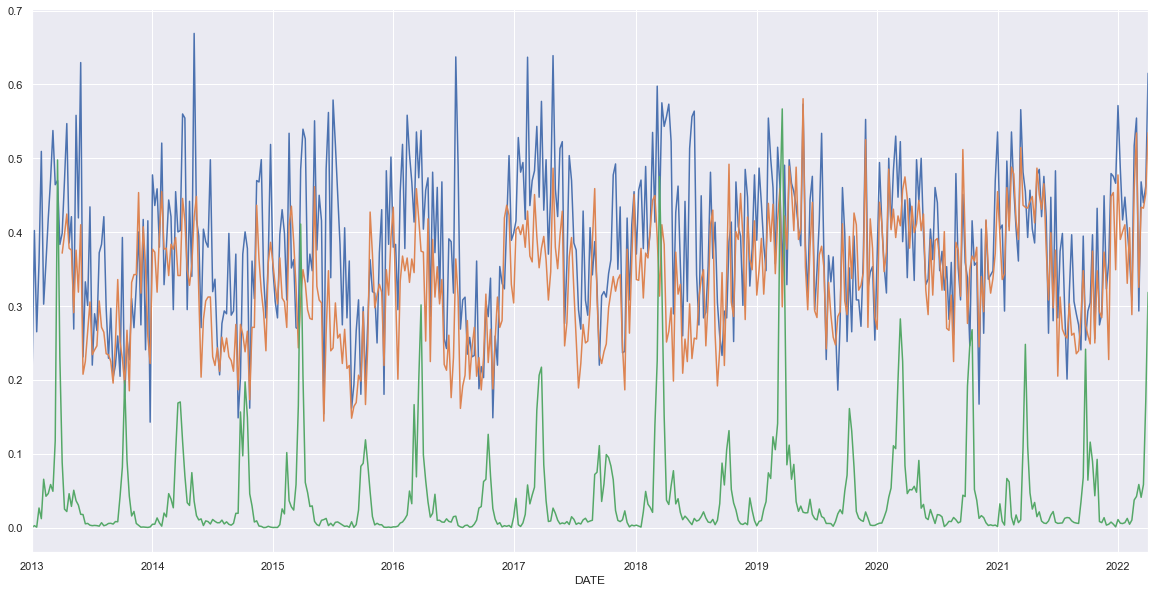

In [56]:
(main_df['AWND_S'].resample('W').mean()/main_df['AWND_S'].max()).plot()
(main_df['AWND_18'].resample('W').mean()/main_df['AWND_18'].max()).plot()
(main_df['pollen_weighted'].resample('W').mean()/main_df['pollen_weighted'].max()).plot()

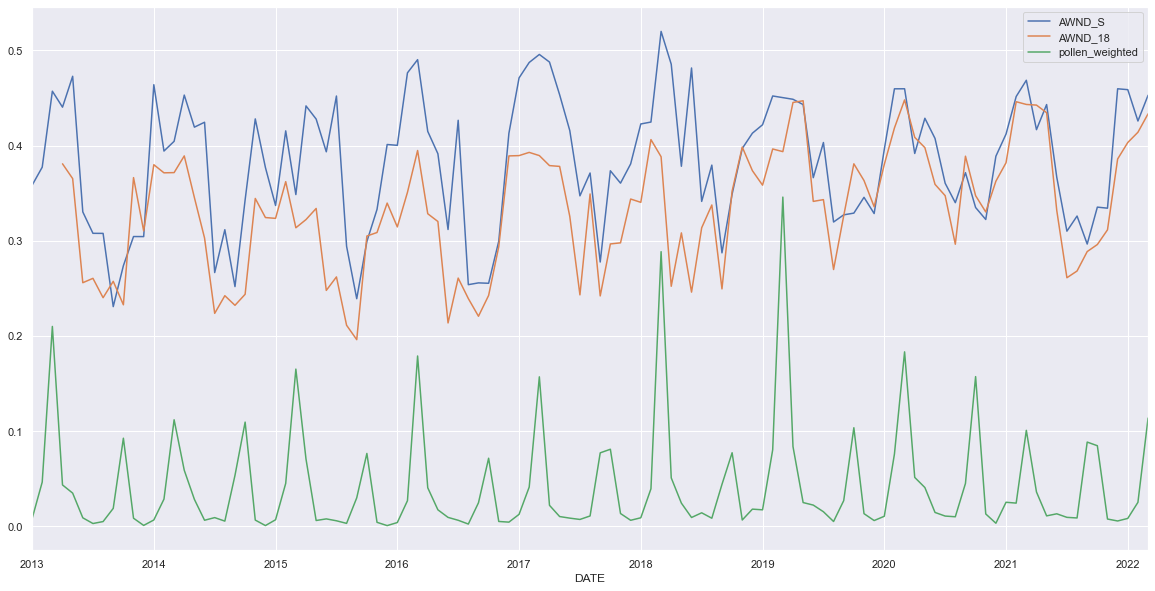

In [61]:
(main_df['AWND_S'].resample('M').mean()/main_df['AWND_S'].max()).plot()
(main_df['AWND_18'].resample('M').mean()/main_df['AWND_18'].max()).plot()
(main_df['pollen_weighted'].resample('M').mean()/main_df['pollen_weighted'].max()).plot()
plt.legend()

<AxesSubplot:xlabel='DATE'>

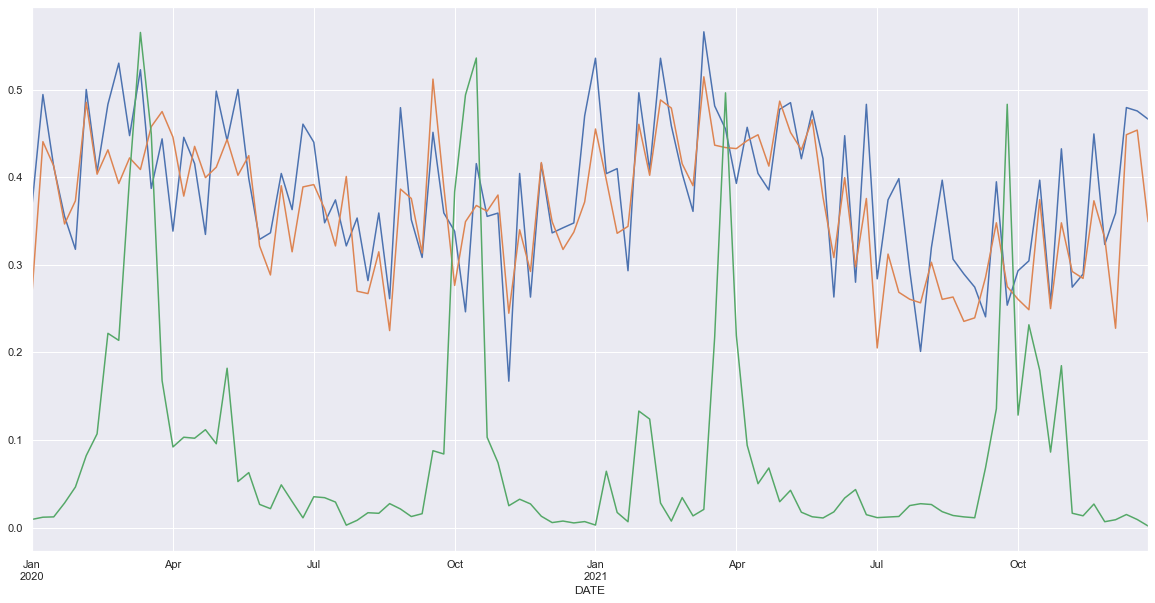

In [63]:
(main_df['AWND_S'].resample('W').mean()['2020':'2021']/main_df['AWND_S'].max()).plot()
(main_df['AWND_18'].resample('W').mean()['2020':'2021']/main_df['AWND_18'].max()).plot()
(main_df['pollen_weighted'].resample('W').mean()['2020':'2021']/main_df['pollen_weighted'].max()*2).plot()

<AxesSubplot:xlabel='DATE'>

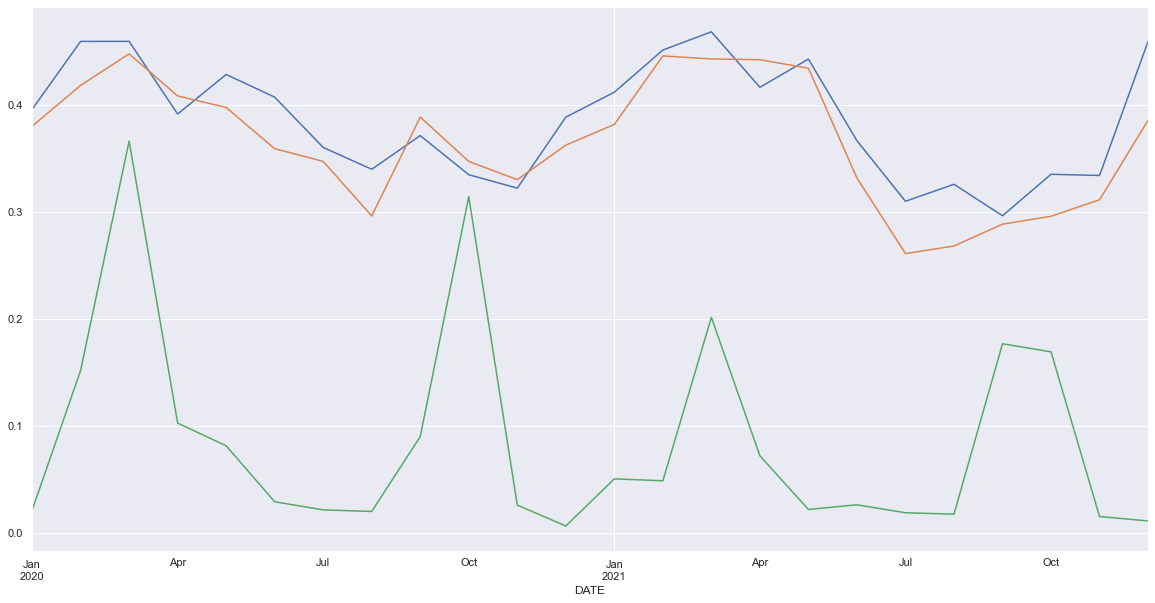

In [64]:
(main_df['AWND_S'].resample('M').mean()['2020':'2021']/main_df['AWND_S'].max()).plot()
(main_df['AWND_18'].resample('M').mean()['2020':'2021']/main_df['AWND_18'].max()).plot()
(main_df['pollen_weighted'].resample('M').mean()['2020':'2021']/main_df['pollen_weighted'].max()*2).plot()

<AxesSubplot:xlabel='DATE'>

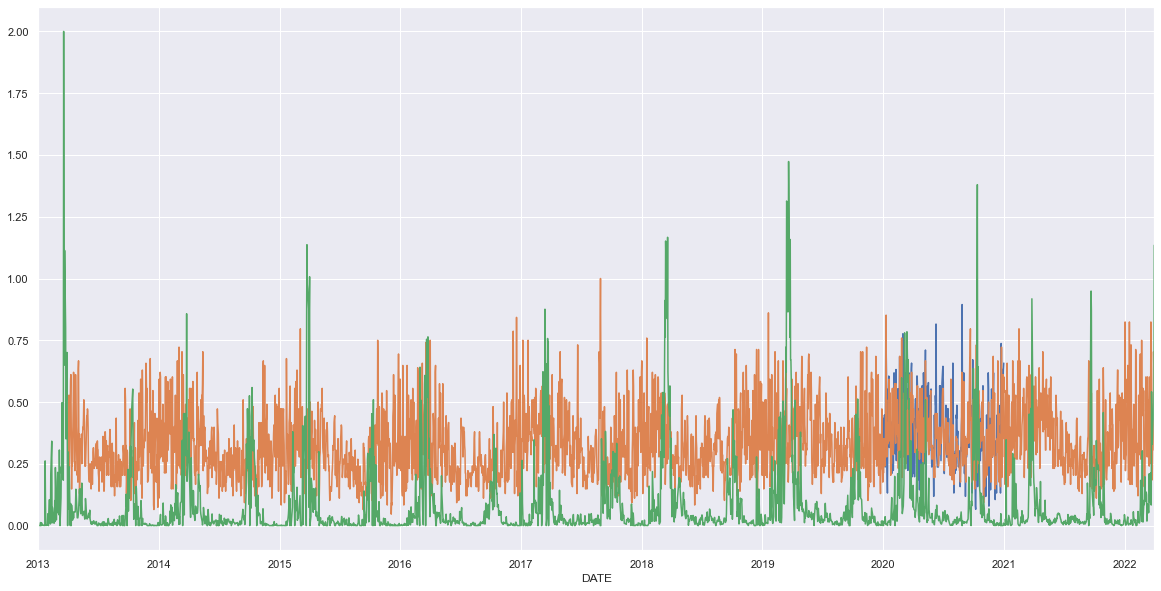

In [62]:
(main_df['AWND_S']['2020']/main_df['AWND_S'].max()).plot()
(main_df['AWND_18']/main_df['AWND_18'].max()).plot()
(main_df['pollen_weighted']/main_df['pollen_weighted'].max()*2).plot()